## Proyecto ML 
- Diamonds

## Librerias

In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import warnings
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

warnings.filterwarnings('ignore')


## 1. Cargar datos

In [57]:
df= pd.read_csv("diamonds.csv", sep=",")
df.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [58]:
#Borro primera colunma ya que es un solo indice
df = df.drop(["Unnamed: 0"], axis=1)

In [59]:
#Creo copia 
label_data = df.copy()

# 2. Problematica ML
- Predecir precio , mediante algoritmo supervisado de regresión

# 3. Divido en train y test

In [83]:
X= label_data.drop(["price"],axis =1)
y= label_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [61]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (40455, 9)
X_test: (13485, 9)
y_train: (40455,)
y_test: (13485,)


# 4. Target
- Variable a predecir: Precio

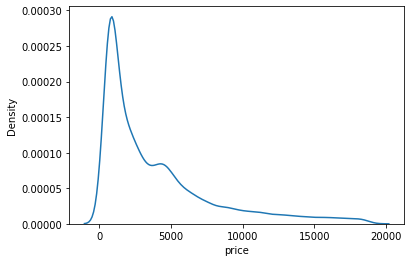

In [62]:
# Check the target distribution
df_target = df['price']
sns.kdeplot(df_target);

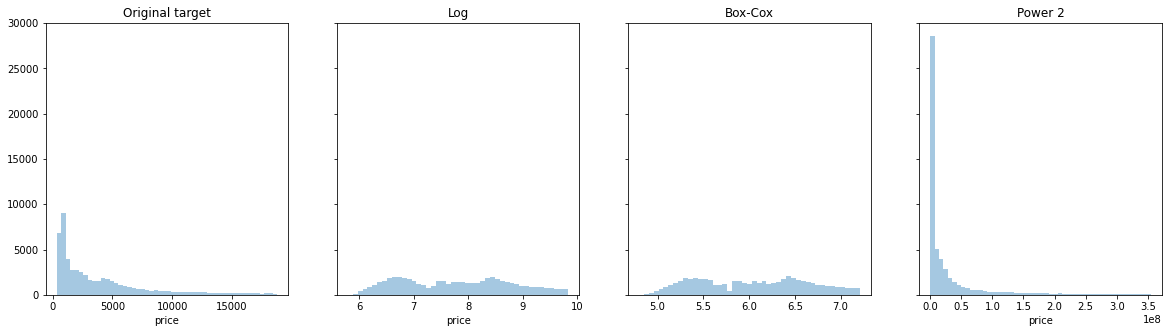

In [63]:

fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey = True)

# Original target
sns.distplot(df_target, kde=False, ax = axes[0])
axes[0].set_title("Original target")

# Logaritmic
sns.distplot(np.log(df_target), kde=False, ax = axes[1])
axes[1].set_title("Log")

# Box-cox
sns.distplot(stats.boxcox(df_target)[0], kde=False, ax = axes[2])
axes[2].set_title("Box-Cox");

# Power 2
sns.distplot(np.power(df_target,2), kde=False, ax = axes[3])
axes[3].set_title("Power 2");

### Aplicamos la transformacion adecuada a nuestros datos

In [64]:
df_target = np.log(df_target)

# 5. Comprensión de variables

In [65]:
# Estadísticos
print(df.describe())
print(df.describe(include="all"))


              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [66]:
# Tipos de los datos
print(df.dtypes)

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


In [67]:
# Tipos de los datos y missings
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
None


In [68]:
# Columnas del dataset
print(df.columns)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


In [69]:
# dimensiones del dataset
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Filas: 53940
Columnas: 10


In [70]:
# Primeros registros
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [71]:
#Últimos registros
df.tail(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [72]:
#Examino si hay missing
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

### Reporte de variables

In [73]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["COL_N"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["DATA_TYPE"])


    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum()*100/len(df),2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns = ["MISSINGS (%)"])


    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns = ["UNIQUE_VALUES"])
    
    percent_cardin = round(unicos["UNIQUE_VALUES"]*100/len(df),2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns = ["CARDIN (%)"])
    
    # Unimos
    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1)
    concatenado.set_index("COL_N", drop=True, inplace=True)
    
    return concatenado.T


data_report(df)  

COL_N,carat,cut,color,clarity,depth,table,price,x,y,z
DATA_TYPE,float64,object,object,object,float64,float64,int64,float64,float64,float64
MISSINGS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
UNIQUE_VALUES,273,5,7,8,184,127,11602,554,552,375
CARDIN (%),0.51,0.01,0.01,0.01,0.34,0.24,21.51,1.03,1.02,0.7


El dataset esta libre de missings

# 6. Feat. Red. Preliminar

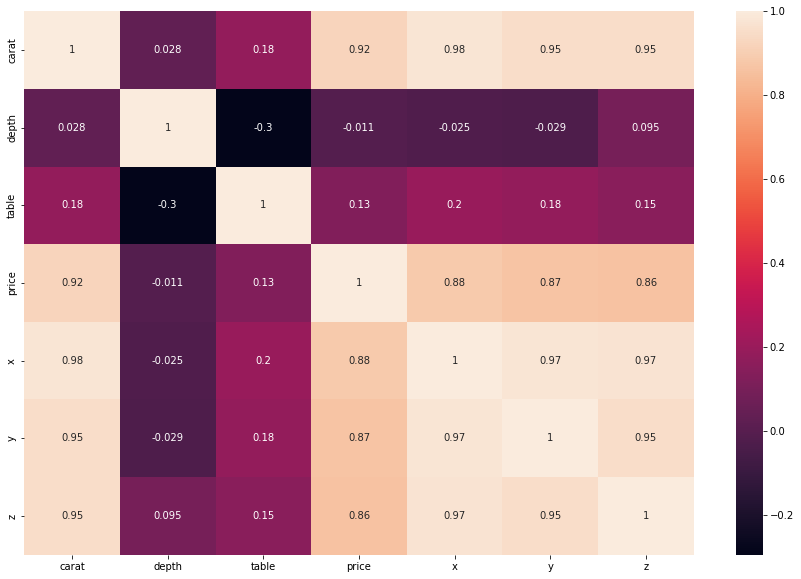

In [74]:
#Comprobamos si hay correlación lineal
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True);

In [75]:
#Observamos solo la correlación con respecto al precio en valores absolutos
#y ordenados de forma descendente

np.abs(df.corr()['price']).sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth    0.010647
Name: price, dtype: float64

# 7. Feature reduction

In [76]:
df.drop(['table','depth'], axis=1, inplace=True)

Observamos que, al ser variables numéricas, la que más correlación tiene con el precio es 'carat'


# 8. Análisis univariante

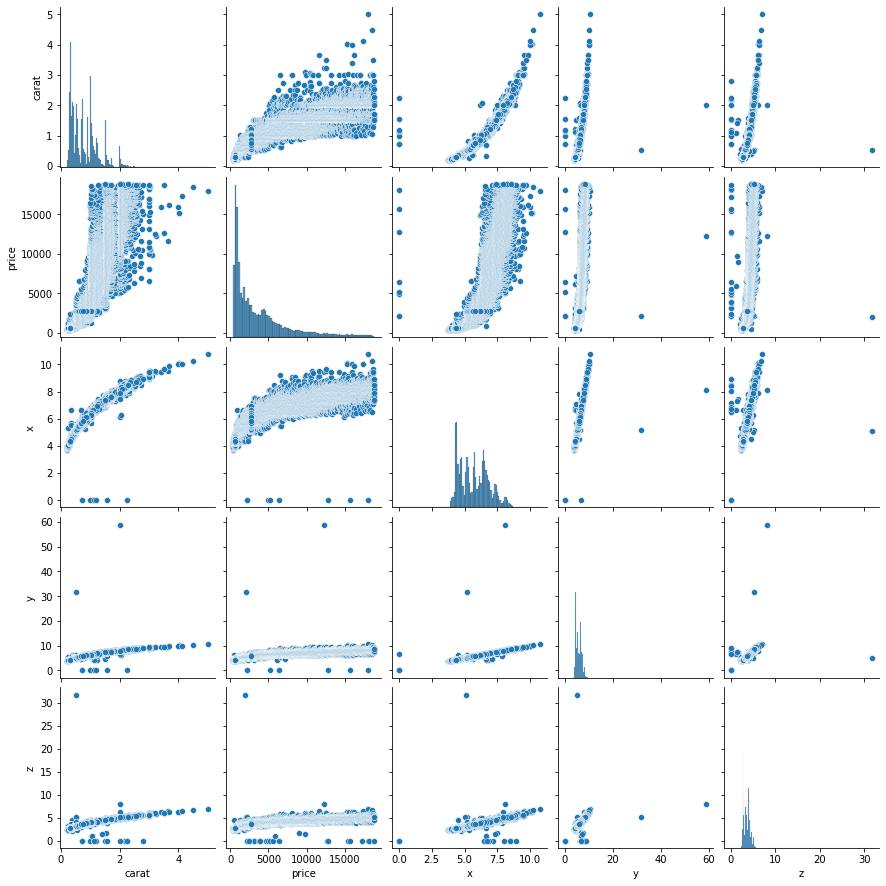

In [77]:
sns.pairplot(df)

# 9. Outliers

Text(0.5, 1.0, 'Posibles outliers en FDP')

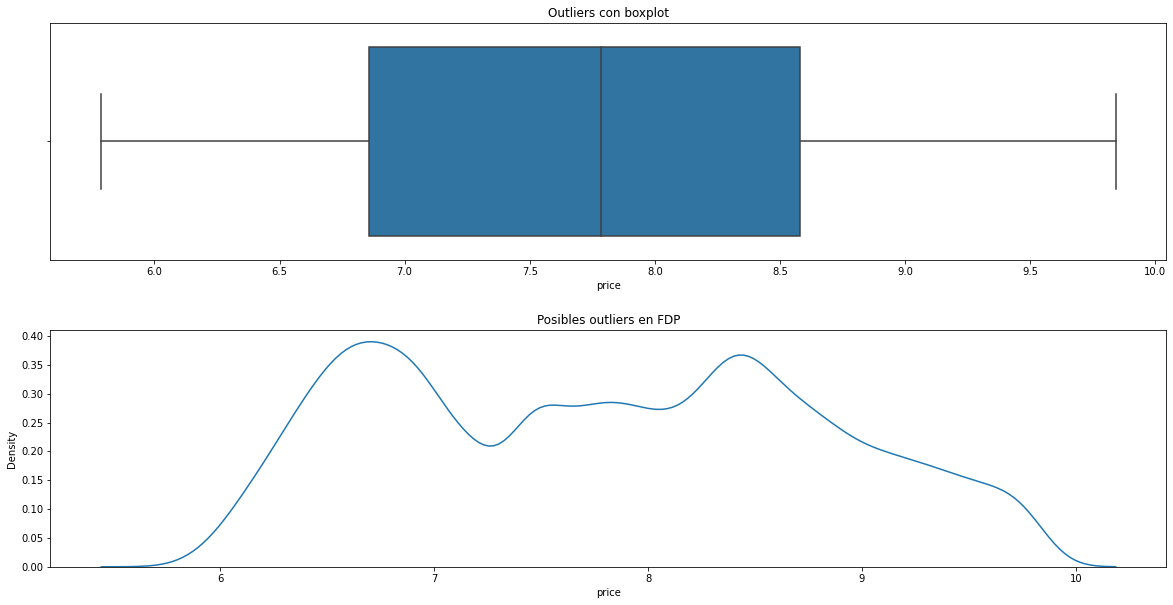

In [78]:
# Target de precio en el dataset de diamonds
fig, axes = plt.subplots(2, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.3)

# Outliers con boxplot
sns.boxplot(df_target, ax=axes[0])
axes[0].set_title("Outliers con boxplot")

# Posibles outliers mediante FDP
sns.kdeplot(df_target, ax=axes[1])
axes[1].set_title("Posibles outliers en FDP")

In [79]:
#Dropping the outliers. 
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53914, 8)

# 10. Missings

- Como se vio en en el analisis de missings en el apartado 5

# 11 Encoding

In [80]:
# Obtengo lista de variables categoricas
s = (df.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [81]:

# Aplicar codificador de etiquetas a cada columna con datos categóricos
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


# 12.Escojo métrica del modelo y defino pipelines

In [93]:
# Contruir pipelins of standard scaler and model for varios regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# Lista de todos los pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

- Imprimo los valores con la validación cruzada

In [94]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -1370.553377 
DecisionTree: -762.553903 
RandomForest: -554.999975 
KNeighbors: -833.941663 
XGBRegressor: -550.702441 


### Probar el modelo con la mejor puntuación 

-En las puntuaciones anteriores, XGBClassifier parece ser el modelo con la mejor puntuación en el error cuadrático medio negativo. Probemos este modelo en un conjunto de prueba y evaluemos con diferentes parámetros.

In [89]:
# Predicción del modelo en datos de prueba
pred = pipeline_xgb.predict(X_test)

In [90]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9812489857143547
Adjusted R^2: 0.9812364618458151
MAE: 279.6602887932619
MSE: 298106.7999281347
RMSE: 545.9915749607632


## Métrica para regresión y evaluacion modelos

In [100]:
# Metricas de regresión
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

diamonds_df2 = pd.get_dummies(df)

lr = LinearRegression()
X = diamonds_df2.drop(columns = ["price"])
Y = diamonds_df2["price"]

lr.fit(X,Y)
preds = lr.predict(X)

#Evaluación de modelos
print("R^2:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("MSE:", mean_squared_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))



R^2: 0.9812489857143547
MAE: 279.6602887932619
MSE: 298106.7999281347
RMSE: 545.9915749607632
Adjusted R^2: 0.9812364618458151


# Mapeo

In [101]:
def mape(y_pred, y_true):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    return 100*np.mean(np.abs((y_true - y_pred)/y_true))

print("MAPE", mape(pred, y_test))

MAPE 7.253836740807299


In [106]:
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Importo las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys
assert sys.version_info >= (3, 5)
from sklearn.svm import SVC
from sklearn import svm
import sklearn
assert sklearn.__version__ >= "0.20"
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, f1_score, recall_score, \
                            roc_auc_score
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


# Pruebo Redes Neuronales

In [112]:
# Redes Neurolanes
sc = StandardScaler()
sc.fit(X_train)
X_train_s = sc.transform(X_train)
X_test_s = sc.transform(X_test)

per_clf = Perceptron(tol=1e-5, random_state=42, max_iter=100,alpha=0.0001, n_jobs=5 ) 
per_clf.fit(X_train_s, y_train)

print('\nEstandarizado Perceptron Accuracy en train: ',accuracy_score(y_train,per_clf.predict(X_train_s)))

y_pred = per_clf.predict(X_test_s)
print('\nEstandarizado Perceptron Accuracy en test:      ', accuracy_score(y_test,y_pred))






Estandarizado Perceptron Accuracy en train:  0.002916821159312817

Estandarizado Perceptron Accuracy en test:       0.0023730070448646644


In [113]:
# Multi-Layer Perceptron Classifier Estandarizado, veo que este modelo es el que mejor resultado me da de todos
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scal = scaler.transform(X_train)
X_test_scal = scaler.transform(X_test)

mlp = MLPClassifier(max_iter=500, random_state=42, activation='logistic')
mlp.fit(X_train_scal, y_train) 
print(mlp.score(X_train_scal, y_train))
print(mlp.score(X_test_scal, y_test))
print('\nMulti-Layer Perceptron estandarizado Accuracy en train: ',accuracy_score(y_train,mlp.predict(X_train_scal)))
#print('Multi-Layer Perceptron estandarizado Recall en train:     ',recall_score(y_train,mlp.predict(X_train_scal)))
#print('Multi-Layer Perceptron estandarizado F1 en train:         ',f1_score(y_train,mlp.predict(X_train_scal)))
#print('Multi-Layer Perceptron estandarizado Roc AUC en train:    ',roc_auc_score(y_train,mlp.predict(X_train_scal)))

y_pred = mlp.predict(X_test_scal)
print('\nMulti-Layer Perceptron estandarizado Accuracy en test:      ', accuracy_score(y_test,y_pred))
#print('Multi-Layer Perceptron estandarizado Recall en test:          ', recall_score(y_test,y_pred))
#print('Multi-Layer Perceptron estandarizado F1 en test:              ', f1_score(y_test,y_pred))
#print('Multi-Layer Perceptron estandarizado Roc AUC en test:         ', roc_auc_score(y_test,y_pred))

0.004647138796193301
0.005042639970337412

Multi-Layer Perceptron estandarizado Accuracy en train:  0.004647138796193301

Multi-Layer Perceptron estandarizado Accuracy en test:       0.005042639970337412
